In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv('/content/dogs-ranking-dataset.csv')
data = df.copy()
df.head()


,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1


**Data Understanding(Data Collection/Data Exploration)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breed                       87 non-null     object 
 1   type                        87 non-null     object 
 2   score                       87 non-null     float64
 3   popularity ranking          87 non-null     int64  
 4   size                        87 non-null     int64  
 5   intelligence                87 non-null     object 
 6   congential ailments         87 non-null     object 
 7   score for kids              87 non-null     float64
 8   size.1                      87 non-null     object 
 9   $LIFETIME COST              87 non-null     object 
 10  INTELLIGENCE RANK           87 non-null     int64  
 11  INTELLIGENCE %              87 non-null     object 
 12  LONGEVITY(YEARS)            87 non-null     float64
 13  NUMBER OF GENETIC AILMENTS  87 non-nu

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(87, 19)

In [ ]:
df.isnull().sum()

Breed                         0
type                          0
score                         0
popularity ranking            0
size                          0
intelligence                  0
congential ailments           0
score for kids                0
size.1                        0
$LIFETIME COST                0
INTELLIGENCE RANK             0
INTELLIGENCE %                0
LONGEVITY(YEARS)              0
NUMBER OF GENETIC AILMENTS    0
GENETIC AILMENTS              0
PURCHASE PRICE                0
FOOD COSTS PER YEAR           0
GROOMING FREQUNCY             0
SUITABILITY FOR CHILDREN      0
dtype: int64

In [ ]:
# standardize column names
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['breed', 'type', 'score', 'popularity_ranking', 'size', 'intelligence',
       'congential_ailments', 'score_for_kids', 'size.1', '$lifetime_cost',
       'intelligence_rank', 'intelligence_%', 'longevity(years)',
       'number_of_genetic_ailments', 'genetic_ailments', 'purchase_price',
       'food_costs_per_year', 'grooming_frequncy', 'suitability_for_children'],
      dtype='object')

In [ ]:
# Calculate basic summary statistics
summary_stats = df.describe(include='all')

# Display the summary statistics
summary_stats

,breed,type,score,popularity_ranking,size,intelligence,congential_ailments,score_for_kids,size.1,$lifetime_cost,intelligence_rank,intelligence_%,longevity(years),number_of_genetic_ailments,genetic_ailments,purchase_price,food_costs_per_year,grooming_frequncy,suitability_for_children
count,87,87,87.000000,87.000000,87.000000,87,87,87.000000,87,87.000000,87.000000,87.000000,87.000000,87.000000,87,87.000000,87.000000,87,87.000000
unique,87,7,NaN,NaN,NaN,6,47,NaN,3,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,3,NaN
top,Border Terrier,sporting,NaN,NaN,NaN,Average,none,NaN,small,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,Once a week,NaN
freq,1,15,NaN,NaN,NaN,21,22,NaN,31,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,65,NaN
mean,NaN,NaN,2.603678,44.000000,1.954023,NaN,NaN,3.681839,NaN,19875.839080,41.540230,50.206897,11.117701,1.689655,NaN,853.540230,489.597701,NaN,1.540230
std,NaN,NaN,0.570288,25.258662,0.819927,NaN,NaN,0.655736,NaN,2988.769576,21.979803,29.037721,1.938465,1.707101,NaN,373.861864,204.266894,NaN,0.678655
min,NaN,NaN,0.990000,1.000000,1.000000,NaN,NaN,1.860000,NaN,13479.000000,1.000000,1.000000,6.290000,0.000000,NaN,288.000000,270.000000,NaN,1.000000
25%,NaN,NaN,2.185000,22.500000,1.000000,NaN,NaN,3.180000,NaN,17988.000000,27.000000,25.000000,10.000000,0.500000,NaN,611.500000,324.000000,NaN,1.000000
50%,NaN,NaN,2.710000,44.000000,2.000000,NaN,NaN,3.810000,NaN,20087.000000,43.000000,49.000000,11.560000,1.000000,NaN,810.000000,466.000000,NaN,1.000000
75%,NaN,NaN,3.035000,65.500000,3.000000,NaN,NaN,4.115000,NaN,21641.500000,59.000000,75.000000,12.430000,2.000000,NaN,1036.500000,466.000000,NaN,2.000000


**Data Preprocessing(Cleaning/Reduction/Transformation)**


In [ ]:
df[['$lifetime_cost', 'intelligence_%', 'purchase_price', 'food_costs_per_year']]

,$lifetime_cost,intelligence_%,purchase_price,food_costs_per_year
0,"$22,638",70%,$833,$324
1,"$21,992",61%,$435,$324
2,"$22,049",45%,$650,$466
3,"$20,224",69%,$750,$324
4,"$18,993",82%,$800,$324
...,...,...,...,...
82,"$21,986",36%,"$1,210",$710
83,"$13,824",7%,$608,$710
84,"$15,898",5%,$515,$466
85,"$20,994",31%,"$1,202",$710


No charts were generated by quickchart


In [ ]:
df['$lifetime_cost'].apply(type).value_counts()

$lifetime_cost
<class 'str'>    87
Name: count, dtype: int64

In [ ]:
df['$lifetime_cost'] = df['$lifetime_cost'].replace({'\$': '', ',': ''}, regex=True).astype(int)
df['intelligence_%'] = df['intelligence_%'].replace({'%': ''}, regex=True).astype(int)
df['purchase_price'] = df['purchase_price'].replace({'\$': '', ',': ''}, regex=True).astype(int)
df['food_costs_per_year'] = df['food_costs_per_year'].replace({'\$': '', ',': ''}, regex=True).astype(int)


In [ ]:
df[['$lifetime_cost', 'intelligence_%', 'purchase_price', 'food_costs_per_year']]

,$lifetime_cost,intelligence_%,purchase_price,food_costs_per_year
0,22638,70,833,324
1,21992,61,435,324
2,22049,45,650,466
3,20224,69,750,324
4,18993,82,800,324
...,...,...,...,...
82,21986,36,1210,710
83,13824,7,608,710
84,15898,5,515,466
85,20994,31,1202,710


In [ ]:
df['$lifetime_cost'].apply(type)

0     <class 'int'>
1     <class 'int'>
2     <class 'int'>
3     <class 'int'>
4     <class 'int'>
          ...      
82    <class 'int'>
83    <class 'int'>
84    <class 'int'>
85    <class 'int'>
86    <class 'int'>
Name: $lifetime_cost, Length: 87, dtype: object

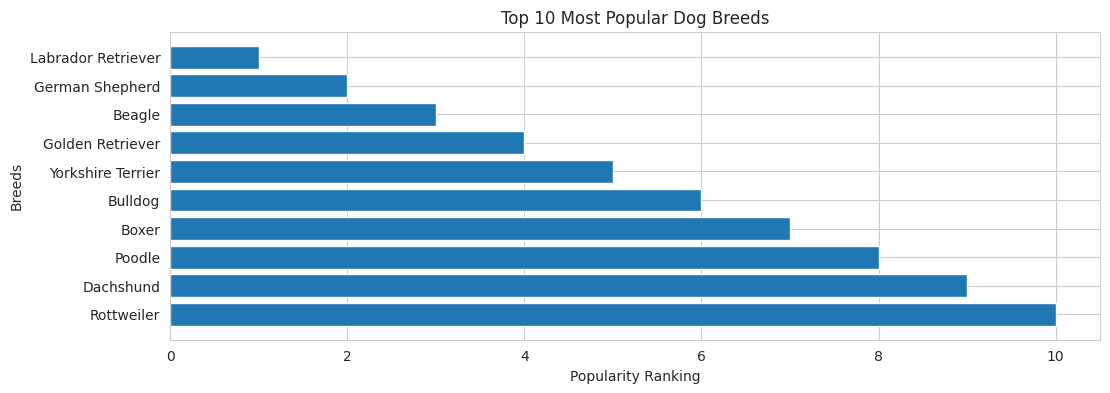

In [ ]:
# top 10 most popular breeds
top_10_popular = df.sort_values('popularity_ranking').head(10)

plt.figure(figsize=(12, 4))
plt.barh(top_10_popular['breed'][::-1], top_10_popular['popularity_ranking'][::-1])
plt.xlabel('Popularity Ranking')
plt.ylabel('Breeds')
plt.title('Top 10 Most Popular Dog Breeds')
plt.show()

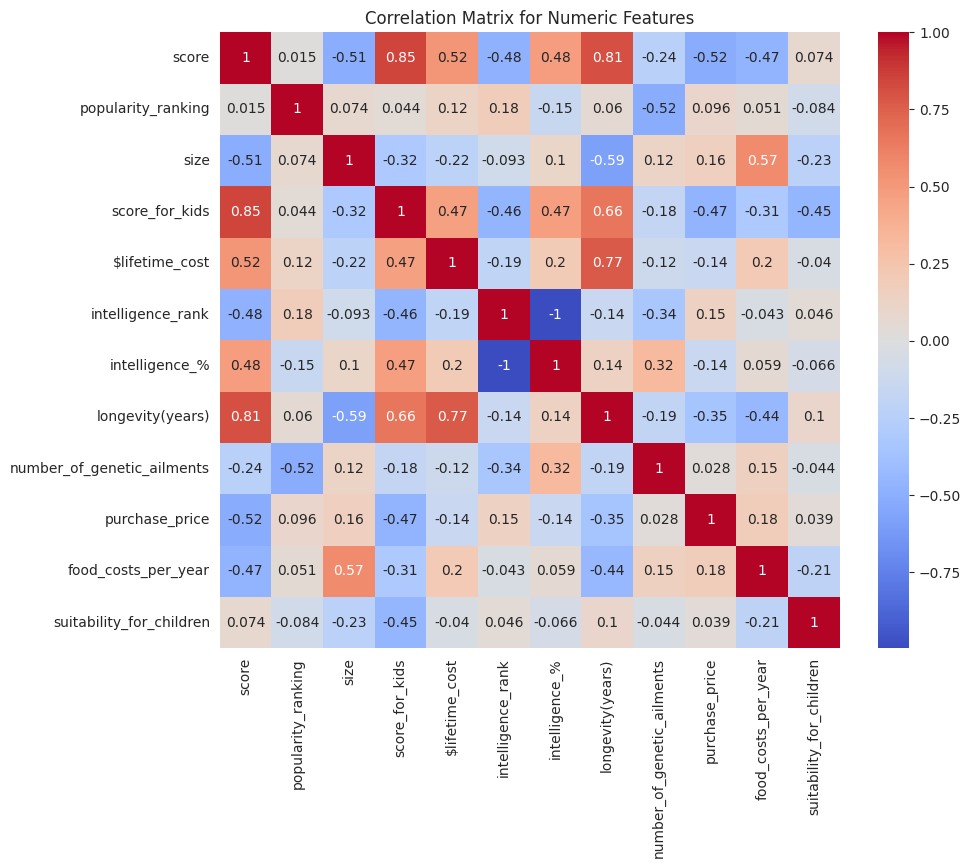

In [ ]:
# get numeric features (int & float) and draw the heatmap for better understanding of correlations between attributes
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_data = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [ ]:
# get numeric features (int & float)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_data = df[numeric_cols].corr()

# Select the correlation values for the specified columns and rows
corr_data.loc[['score', 'score_for_kids', '$lifetime_cost', 'longevity(years)'],
             ['score', 'score_for_kids', '$lifetime_cost', 'longevity(years)']]

,score,score_for_kids,$lifetime_cost,longevity(years)
score,1.000000,0.851044,0.518920,0.811903
score_for_kids,0.851044,1.000000,0.467339,0.657348
$lifetime_cost,0.518920,0.467339,1.000000,0.771113
longevity(years),0.811903,0.657348,0.771113,1.000000


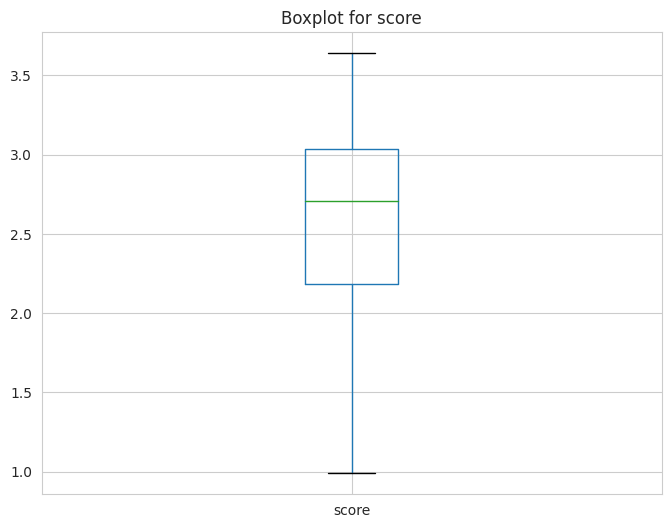

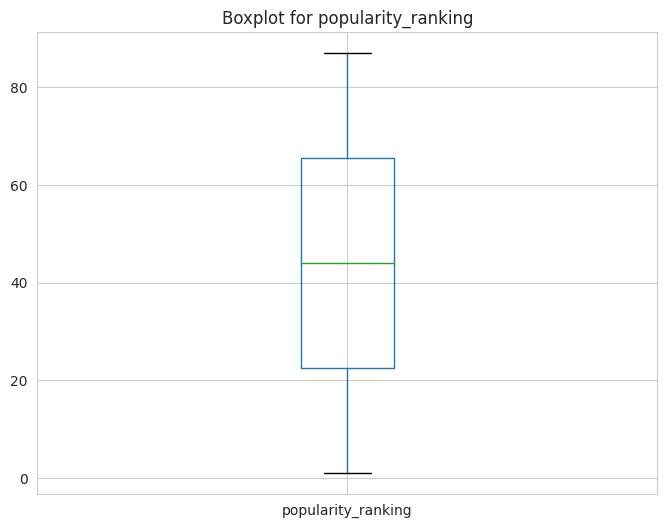

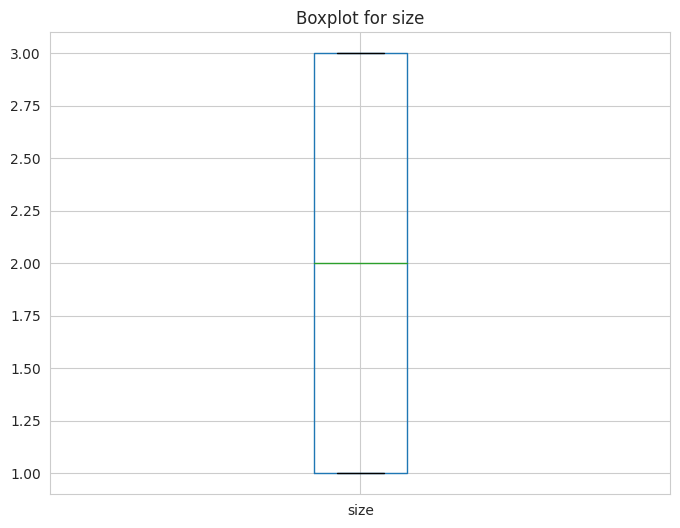

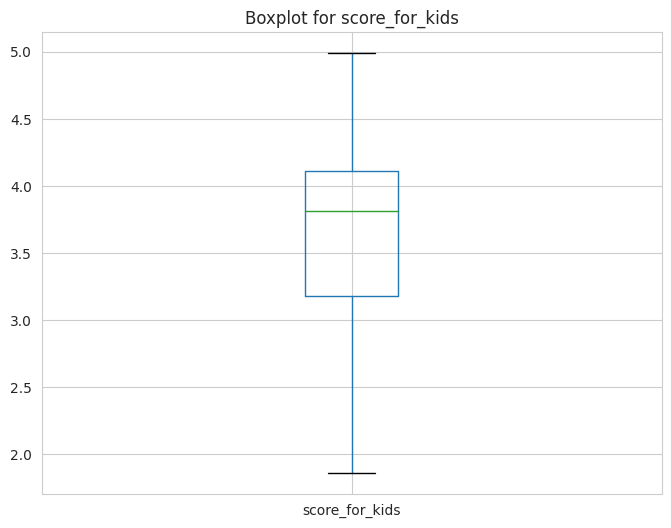

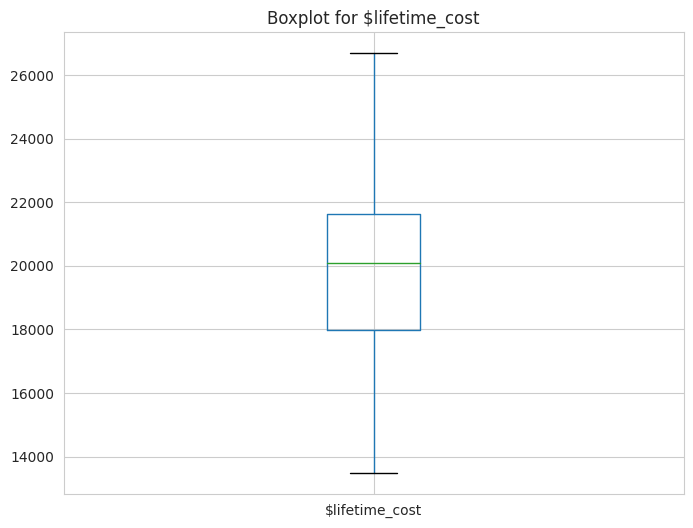

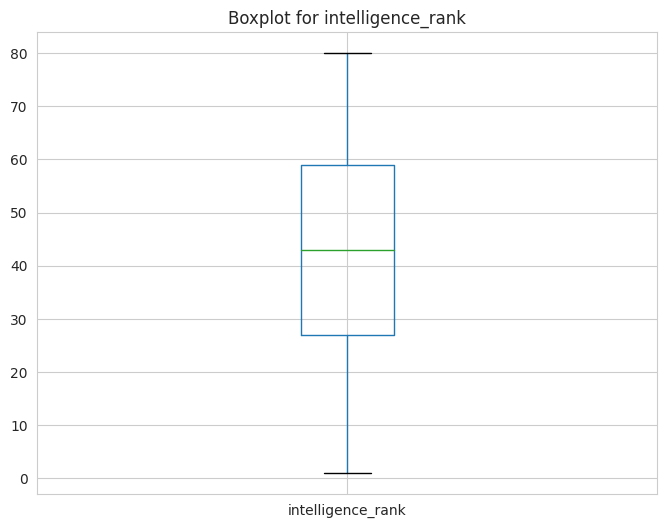

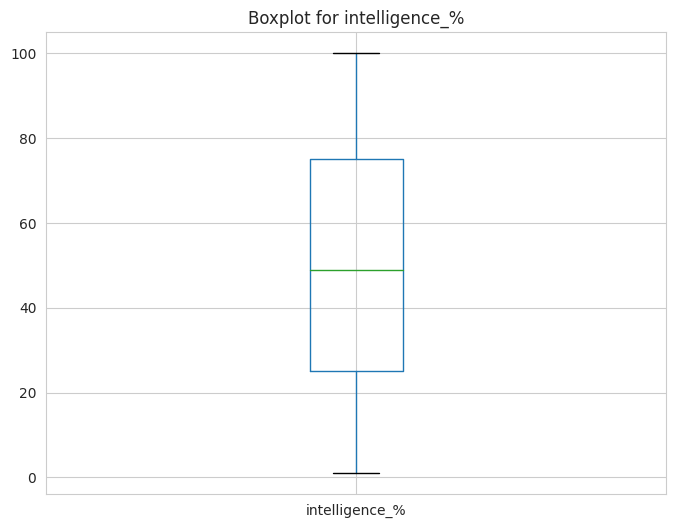

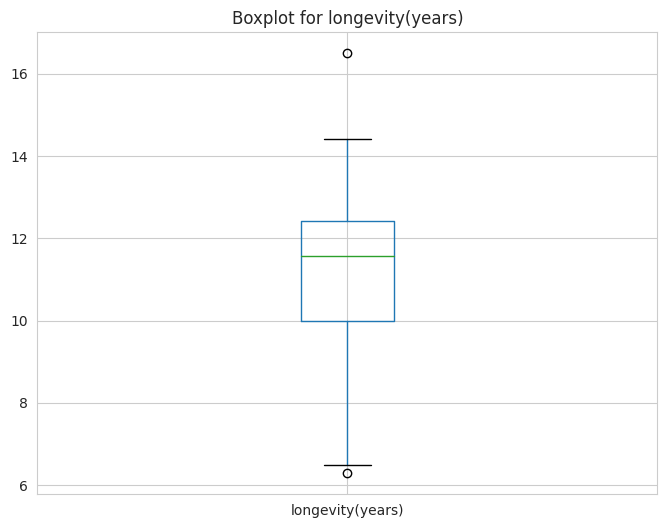

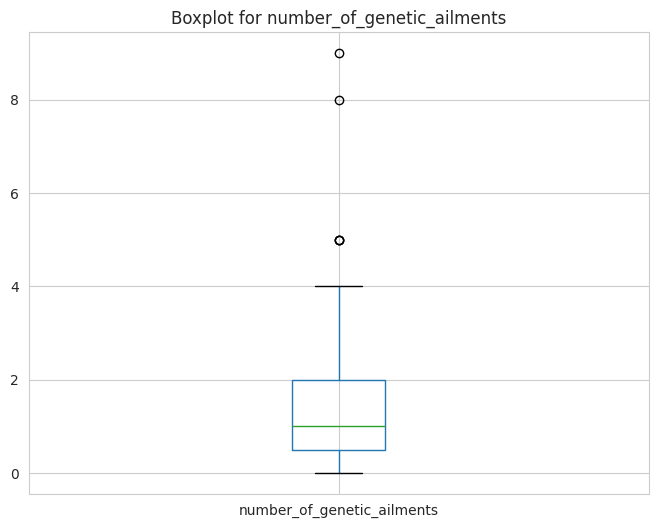

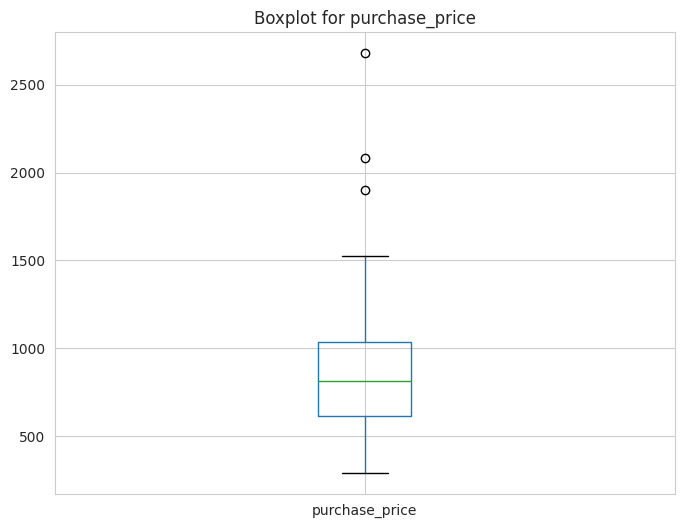

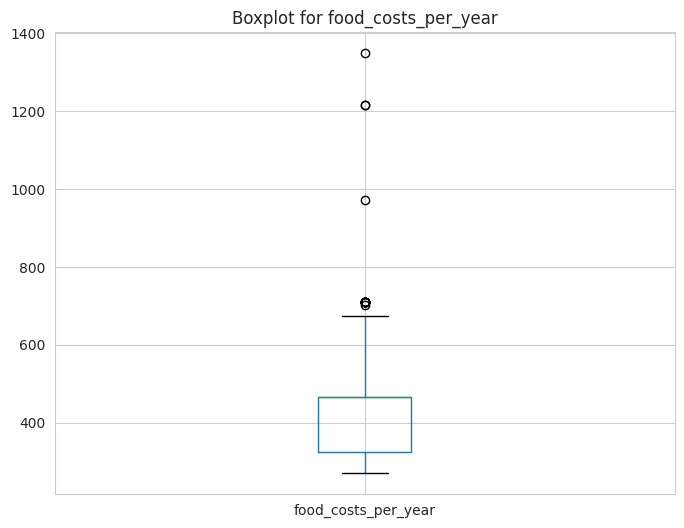

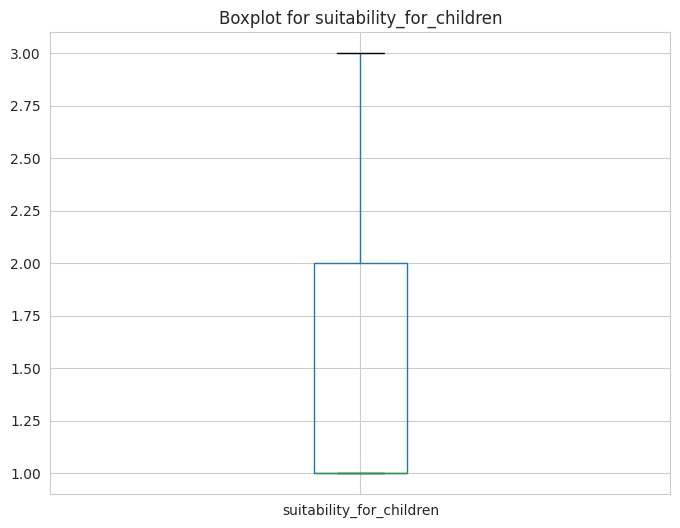

In [ ]:
# Boxplots for numerical features
for column in numeric_cols:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

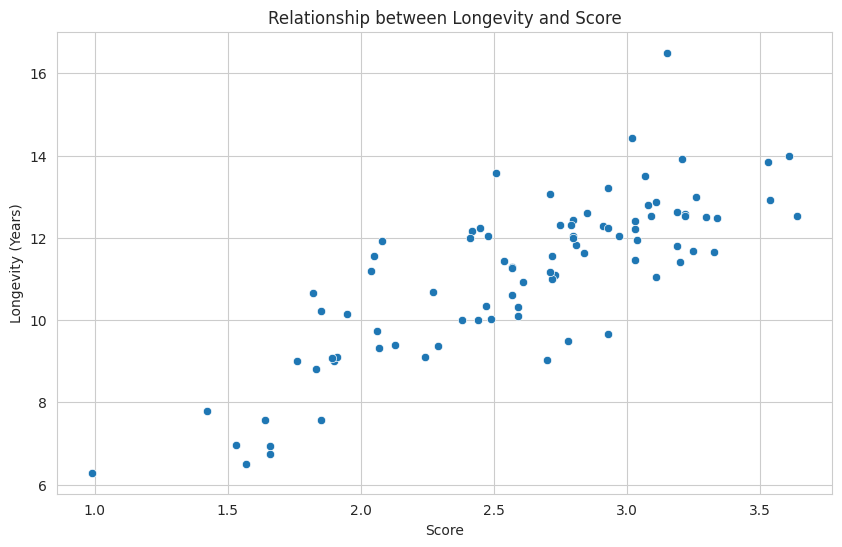

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='score', data=df)
plt.ylabel('Longevity (Years)')
plt.xlabel('Score')
plt.title('Relationship between Longevity and Score')
plt.show()

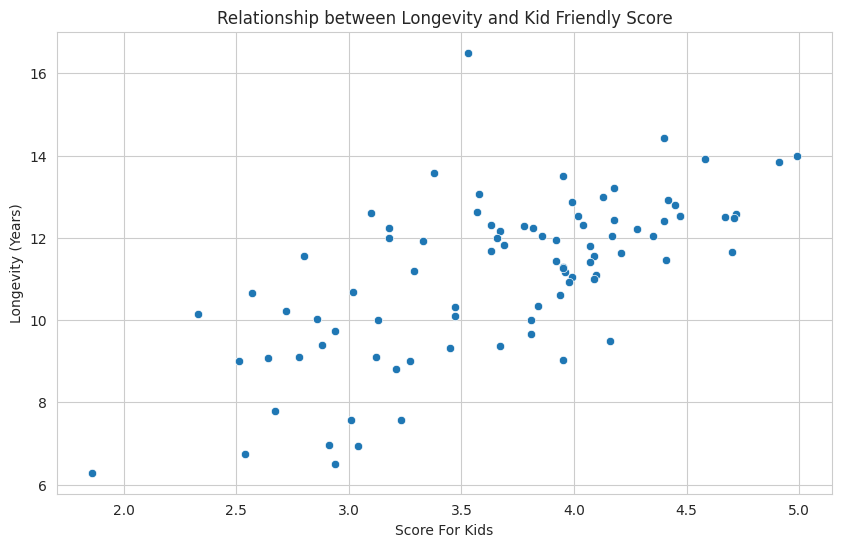

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='score_for_kids', data=df)
plt.ylabel('Longevity (Years)')
plt.xlabel('Score For Kids')
plt.title('Relationship between Longevity and Kid Friendly Score')
plt.show()

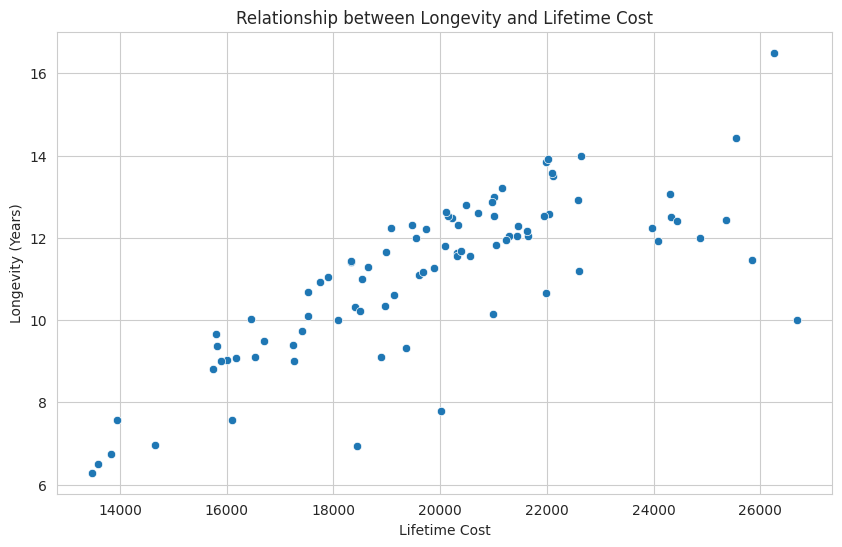

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='$lifetime_cost', data=df)
plt.ylabel('Longevity (Years)')
plt.xlabel('Lifetime Cost')
plt.title('Relationship between Longevity and Lifetime Cost')
plt.show()

(0.0, 20.0)

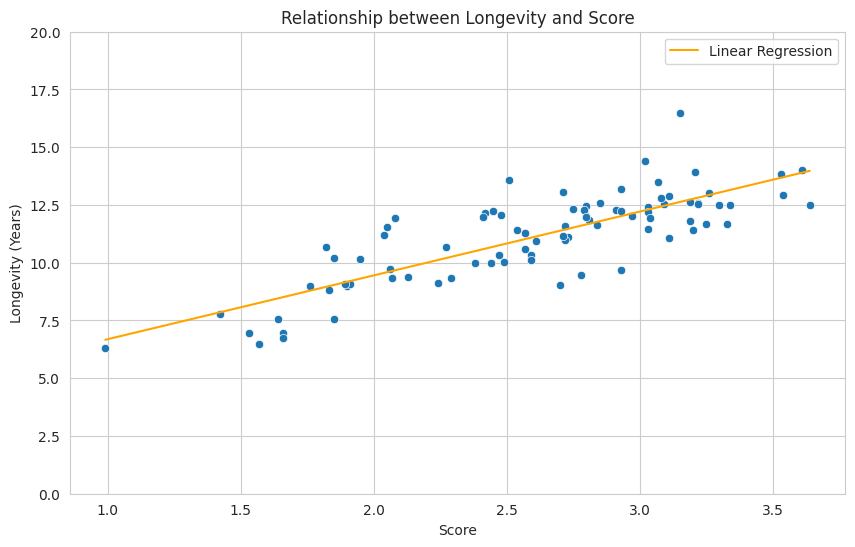

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='score', data=df)
plt.ylabel('Longevity (Years)')
plt.xlabel('Score')
plt.title('Relationship between Longevity and Score')

X = df['score'].values.reshape(-1,1)
y = df['longevity(years)'].values

# fit linear regression
lr = LinearRegression()
lr.fit(X, y)

# plot regression line
x_range = np.linspace(df['score'].min(), df['score'].max(), 100)
y_range = lr.predict(x_range.reshape(-1,1))
plt.plot(x_range, y_range, color= 'orange', label='Linear Regression')
plt.legend()
plt.ylim(0,20)

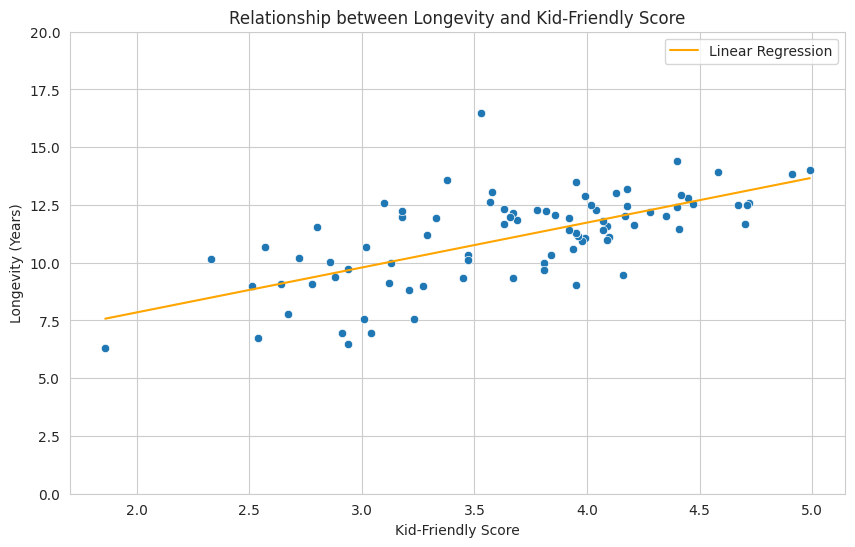

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='score_for_kids', data=df)
plt.ylabel('Longevity (Years)')
plt.xlabel('Kid-Friendly Score')
plt.title('Relationship between Longevity and Kid-Friendly Score')

X = df['score_for_kids'].values.reshape(-1,1)
y = df['longevity(years)'].values

# fit linear regression
lr = LinearRegression()
lr.fit(X, y)

# plot regression line
x_range = np.linspace(df['score_for_kids'].min(), df['score_for_kids'].max(), 100)
y_range = lr.predict(x_range.reshape(-1,1))
plt.plot(x_range, y_range, color= 'orange', label='Linear Regression')
plt.legend()
plt.ylim(0,20)
plt.show()

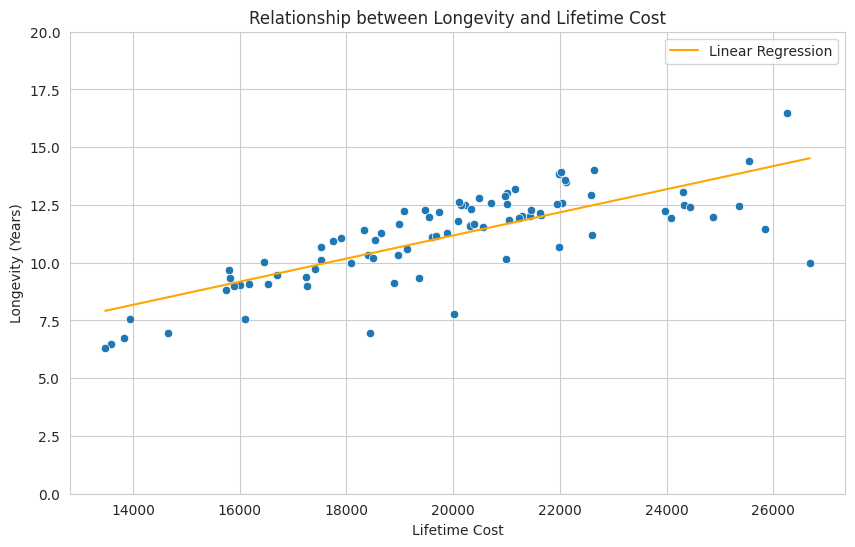

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='$lifetime_cost', data=df)
plt.ylabel('Longevity (Years)')
plt.xlabel('Lifetime Cost')
plt.title('Relationship between Longevity and Lifetime Cost')

X = df['$lifetime_cost'].values.reshape(-1,1)
y = df['longevity(years)'].values

# fit linear regression
lr = LinearRegression()
lr.fit(X, y)

# plot regression line
x_range = np.linspace(df['$lifetime_cost'].min(), df['$lifetime_cost'].max(), 100)
y_range = lr.predict(x_range.reshape(-1,1))
plt.plot(x_range, y_range, color= 'orange', label='Linear Regression')
plt.legend()
plt.ylim(0,20)
plt.show()

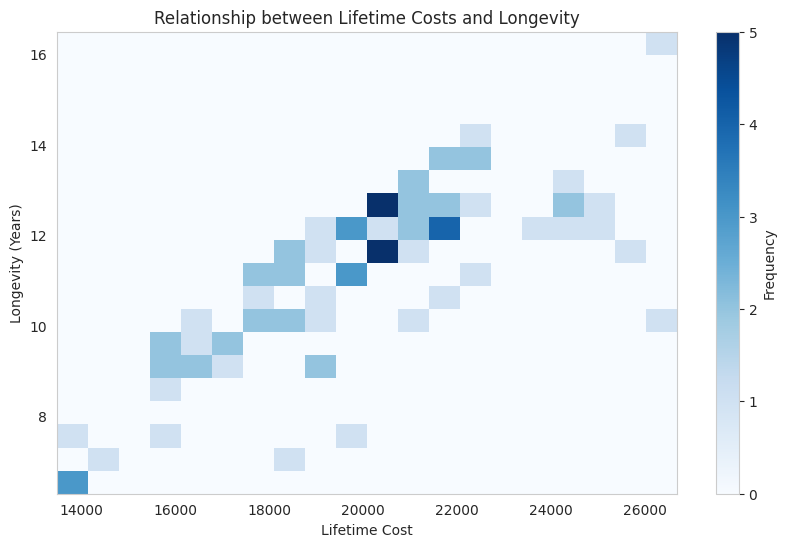

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist2d(df['$lifetime_cost'], df['longevity(years)'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Lifetime Cost')
plt.ylabel('Longevity (Years)')
plt.title('Relationship between Lifetime Costs and Longevity')
plt.show()